## Feature Preprocessing / Engineering & Models

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Load the data

In [2]:
# df = pd.read_csv('../Data/diamonds.csv')
DATA_DIR = '../Data'
FILE_NAME = 'diamonds.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
df = pd.read_csv(data_path)

### Handling Missing Values
We saw from the describe() function in EDA above that there were zero values in the x,y & z columns which is impossible considering they are dimensions and will therefore be handled as missing values. Let look at the values of x = 0.

In [3]:
df.loc[df['x']==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


From above, with the exception of the first row, we are going to drop the rest of the 7 rows (which is actually insigificant considering we have 53940 rows)    since all dimensions, x, y & z have zero values.We will then replace x, z values for row 11182 with the median.

In [4]:
# Drop rows where all dimensions have zero values and replace x & z values for row 11182 with the median
df = df[df.y != 0] #keep only rows where y != 0
df['x'] = df['x'].map( lambda x : df.x.median() if x == 0 else x) 
df['z']=df['z'].replace(0,df['z'].median())

In [5]:
#lets check if the have indeed been replaced with the median & the rest dropped
df.loc[(df['x'] == 0) | (df['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [6]:
# let also check if filled using the index for that row 11182
df.loc[11182]

carat       1.07
cut        Ideal
color          F
clarity      SI2
depth       61.6
table         56
price       4954
x            5.7
y           6.62
z           3.53
Name: 11182, dtype: object

### Handling Outliers
From the descriptive statistics, the max values of the carat, y & z columns were considered as outliers, & we have to deal with them. Let explore how many rows are affected.

In [7]:
#locate rows with 'carat' > 5 or 'y' > 30 or 'z' > 30
df.loc[(df['carat'] >= 5.00) | (df['y'] > 30) | (df['z'] > 30)]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [8]:
# drop them since they are also insignificantly small number of rows(4)
df = df.drop(df.loc[(df['carat'] >= 5.00) | (df['y'] > 30) | (df['z'] > 30)].index)

In [9]:
# lets check if dropped
df.loc[(df['carat'] >= 5.00) | (df['y'] > 30) | (df['z'] > 30)]

,carat,cut,color,clarity,depth,table,price,x,y,z


### One Hot Encode (OHE) Categorical Features

In [10]:
cat_features =['cut', 'color', 'clarity']
for feature in cat_features:
    df = pd.concat([df, pd.get_dummies(df[feature], prefix = feature)], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### Train-test split

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(['cut','color','clarity','price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Dimensionality reduction using Principal Component Analysis (PCA)
Use PCA reduction technique to transform the original features into another set of feature(s) that are linearly uncorrelated

In [12]:
# Do PCA for x,y & z which has the problem of high correlation essentially because they have almost the same information

from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=42)
X_train['xyz_pca'] = pca.fit_transform(X_train[['x','y','z']]).flatten() #for X_train
X_test['xyz_pca'] = pca.transform(X_test[['x','y','z']]).flatten() #for X_test

# Drop x, y, and z
X_train.drop(['x','y','z'], axis=1, inplace=True)
X_test.drop(['x','y','z'], axis=1, inplace=True)

### Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

# Scale our numerical features so they have zero mean and a variance of one
numerical_features = ['carat', 'depth', 'table', 'xyz_pca'] 
scaler = StandardScaler()

# for X_train 
scaler.fit(X_train[numerical_features]) 
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

# for X_test
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [14]:
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((5393, 24), (48536, 24), (5393,), (48536,))

### Build & Compare Different ML Regression Models

In [15]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [17]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
from xgboost import XGBRegressor

XGB = XGBRegressor()
XGB.fit(X_train, y_train)

[03:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

### Evaluation

In [19]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

eval_scores = pd.DataFrame(columns=['train_r2', 'test_r2', 'train_rmse', 'test_rmse', 'train_mae', 'test_mae'], index=['Lin_Reg', 'KNN', 'Rdm_Forest', 'XGBoost'])
model_dict = {'Lin_Reg': LR, 'KNN': knn, 'Rdm_Forest': RF, 'XGBoost': XGB}
for name, model in model_dict.items():
    eval_scores.loc[name, 'train_r2'] = metrics.r2_score(y_true=y_train, y_pred=model.predict(X_train))
    eval_scores.loc[name, 'test_r2'] = metrics.r2_score(y_true=y_test, y_pred=model.predict(X_test))
    eval_scores.loc[name, 'train_rmse'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))**0.5
    eval_scores.loc[name, 'test_rmse'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))**0.5
    eval_scores.loc[name, 'train_mae'] = mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train))
    eval_scores.loc[name, 'test_mae'] = mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test))
    
eval_scores

,train_r2,test_r2,train_rmse,test_rmse,train_mae,test_mae
Lin_Reg,0.920403,0.92122,1125.85,1113.38,734.815,736.3
KNN,0.973075,0.95823,654.801,810.709,348.285,436.988
Rdm_Forest,0.997376,0.981854,204.426,534.351,103.097,276.225
XGBoost,0.96698,0.966222,725.137,729.04,400.396,402.015


From all the metrics from above, we can conclude that the Random Forest Regressor is the best performing model. Focussing on the test data, we observe an almost perfect R-squared, meaning, 98%  of the variability observed in the diamond prices is explained or captured by our model and the other 2% being due to some other factors and, of course, randomness. The RMSE tells us that on average, the predictions of the model are 535.92 USD from the actual values, while the MAE of 276.58, informs that, the error the model will make is, on average 276.58 USD.

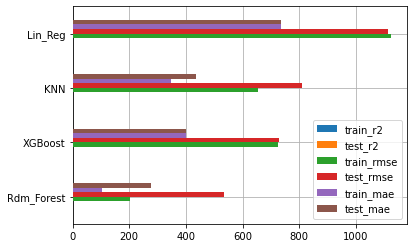

In [20]:
fig, ax = plt.subplots()
eval_scores.sort_values(by='test_r2', ascending=False).plot(kind='barh', ax=ax, zorder=4)
ax.grid(zorder=0)

In [21]:
# Lets compare the actual and predicted prices for all the models
demo_pred = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['pred_'+name] = model.predict(demo_pred).round(1)

pd.DataFrame(pred_dict)

,y_true,pred_Lin_Reg,pred_KNN,pred_Rdm_Forest,pred_XGBoost
34228,855,-345.7,612.4,848.2,497.299988
19057,7840,9271.3,8879.0,8363.9,8871.299805
46370,1760,2401.8,2020.0,1749.2,1836.900024
22645,10693,6883.3,10876.6,10815.1,8919.000000
16423,6559,7443.8,6876.4,6912.4,7308.799805
13142,5437,4820.8,5015.4,4567.7,4886.600098
9798,4666,4607.0,4646.6,4385.3,4058.000000
9804,4668,4832.4,4245.8,4656.8,4745.100098
39081,1060,1579.4,922.8,1000.2,1106.000000
41864,1257,2091.6,1281.0,1387.2,1155.199951


#### Continue with Best Model, i.e Random Forest

In [22]:
# Calculate Residuals & the percentage that the absolute value of the residual represents w.r.t the actual price
y_pred = RF.predict(X_test)
eval_df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
eval_df["residuals"] = y_test - y_pred
eval_df["prop_error"] = eval_df["residuals"].abs()/eval_df["y_true"]
eval_df 

,y_true,y_pred,residuals,prop_error
34228,855,848.15,6.85,0.008012
19057,7840,8363.91,-523.91,0.066825
46370,1760,1749.17,10.83,0.006153
22645,10693,10815.09,-122.09,0.011418
16423,6559,6912.37,-353.37,0.053876
...,...,...,...,...
40527,1147,1284.05,-137.05,0.119486
52304,548,477.51,70.49,0.128631
40420,1134,1202.96,-68.96,0.060811
37020,965,853.26,111.74,0.115793


In [23]:
# calculate the percentage of predictions under a perticular number, e.g. 15%

costum_metric = 100*(eval_df["prop_error"] < 0.15).mean()
print("Custom metric: {:,.2f}%".format(costum_metric))

Custom metric: 81.35%


From above, 81.44% of the predictions we are making have an error that is less than 15% of the actual price.

In [24]:
(eval_df["residuals"] <=0).mean()

0.5258668644539217

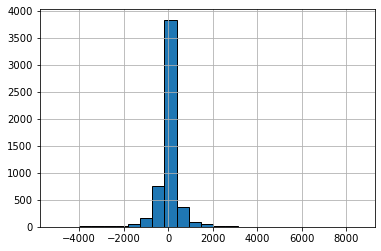

In [25]:
# Visualizing Residuals

eval_df["residuals"].hist(bins=25, ec='k');

In [26]:
# Percentage negative residuals
(eval_df["residuals"] <=0).mean()

0.5258668644539217

We see that most of the residuals are within 1,000 USD with a high proportion of them are between -500 and 0. Also, 52% percent of the residuals are negative, which implies that the model might be systematically overestimating the prices.

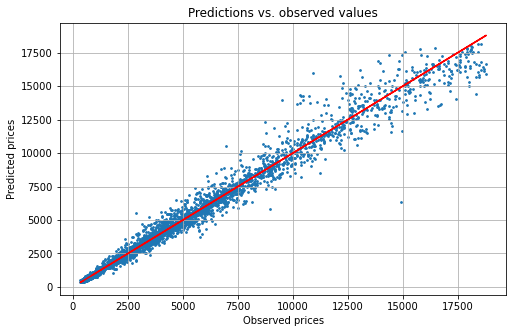

In [27]:
# Visualizing the actual versus the predicted prices:

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(eval_df["y_true"], eval_df["y_pred"], s=3)
ax.plot(eval_df["y_true"], eval_df["y_true"], color='red')
ax.set_title('Predictions vs. observed values')
ax.set_xlabel('Observed prices')
ax.set_ylabel('Predicted prices')
ax.grid();

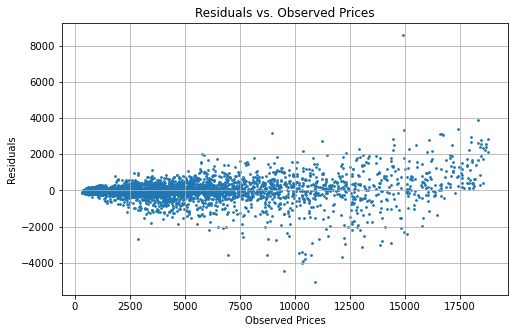

In [28]:
# Visualizing the Residuals versus the observed prices:

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(eval_df["y_true"], eval_df["residuals"], s=3)
ax.set_title('Residuals vs. Observed Prices')
ax.set_xlabel('Observed Prices')
ax.set_ylabel('Residuals')
ax.grid();

From above, we can conclude that the model has more predictive power with lower prices than with higher prices, since the largest residuals are associated with high diamond prices while almost all of the residuals for diamonds of a price of 5,000 or less are below 2,000.

### Using the best model to predict the price of a diamond

In [29]:
# Making predictions
from collections import OrderedDict

new_diamond = OrderedDict([('carat',0.45), ('depth',62.3), ('table',59.0), ('x',3.95),
                           ('y',3.92), ('z',2.45), ('cut_Good',0.0), ('cut_Ideal',0.0),
                           ('cut_Premium',1.0), ('cut_Very Good',0.0), ('color_E',0.0), 
                           ('color_F',0.0), ('color_G',1.0), ('color_H',0.0), ('color_I',0.0),
                           ('color_J',0.0), ('clarity_IF',0.0), ('clarity_SI1',0.0),
                           ('clarity_SI2',0.0), ('clarity_VS1',0.0), ('clarity_VS2',0.0),
                           ('clarity_VVS1',1.0), ('clarity_VVS2',0.0), ('carat_squared',0.0576)])

new_diamond = pd.Series(new_diamond).values.reshape(1,-1)

In [30]:
price = RF.predict(new_diamond)
print('for your given specifications, the price is USD', + price) 

for your given specifications, the price is USD [5779.44]
